In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', cache = False)

In [3]:
import numpy as np
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]
mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
sort_by_target(mnist)

In [4]:
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [5]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

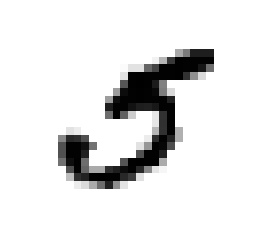

In [7]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X[36000]
ome_digit_image = some_digit.reshape(28, 28)
plt.imshow(ome_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis('off')
plt.show()

In [8]:
y[36000]

5

In [9]:
def plot_digit(data):
    reshape_data = data.reshape(28,28)
    plt.imshow(reshape_data, mpl.cm.binary, interpolation = 'nearest')
    plt.axis('off')


In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
# shuffle the train dataset
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Binary Classifier

In [11]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [12]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter = 5, tol=-np.infty, random_state=123)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=123, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [13]:
sgd_clf.predict([some_digit])

array([ True])

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')

array([0.95725, 0.9634 , 0.9629 ])

In [15]:
from sklearn.base import BaseEstimator

class Never5Classifer(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype = bool)


In [16]:
nvr_5_clf = Never5Classifer()
cross_val_score(nvr_5_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy') 

array([0.9083 , 0.90995, 0.9107 ])

# Confusion Matrix

In [17]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)


In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[54136,   443],
       [ 1886,  3535]], dtype=int64)

In [19]:
confusion_matrix(y_train_5, y_train_5) ## misclassify would be 0

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [20]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred)) 
print(recall_score(y_train_5, y_train_pred))
print(4115/(845+4115))
print(4115/(1306+4115))

0.8886375062845651
0.6520937096476664
0.8296370967741935
0.7590850396605793


In [21]:
## f1 score, harmonic mean of precision and recall
# whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values
# so only get a high F1 score if both recall and precision are high
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7522076816682626

In [22]:
## increasing precision reduces recall, and vice versa. This is called the precision/recall tradeoff
some_digit

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [23]:
# threshold
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([226129.12172593])

In [24]:
threshold = 0  # the SGDCLASSIFIER uses a threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [25]:
# what if we rasie the threshold
threshold  = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred
### raising the threshold decreases recall


array([ True])

In [26]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = 'decision_function')

In [27]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

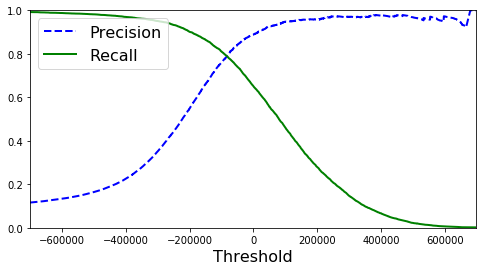

In [28]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

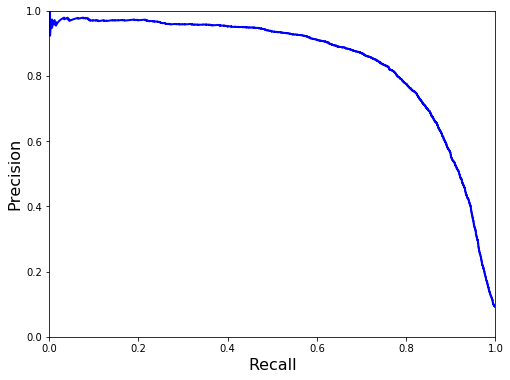

In [29]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
#save_fig("precision_vs_recall_plot")
plt.show()

In [30]:
y_train_pred_90 = (y_scores > 70000)
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))

0.9322813938198553
0.52315071020107


# The ROC curve is another common tool used with binary classifiers. It plots the true position rate (another name for recall) against the false positive rate.  The FPR is the ratio of negative instances that are incorrectly classified as positive(1- true negative rate). The TNR is also called specificity, hence the ROC curve plots sentitivity(recall) versus 1 - specificity


In [31]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_train_5, y_scores)

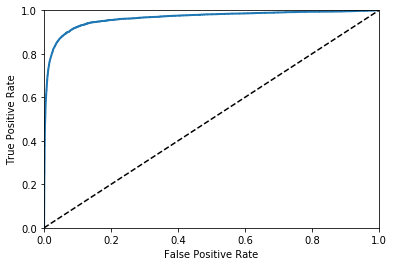

In [32]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

In [33]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9642913019917457

# Since the ROC curve is so similar to the precision/recall curve, as a rule of thumb, you should prefer the PR curve whenever the positive class is rare or when you care more about the false positives than the false engatives, and the ROC curve otherwise.

In [34]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 123)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3, method = 'predict_proba')

D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


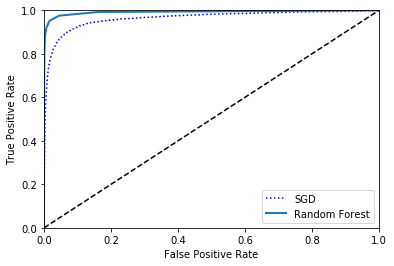

In [35]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5,y_scores_forest)
plt.plot(fpr,tpr,'b:',label = 'SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc = 'lower right')
plt.show() # the random forest roc is closer to the top left corner

In [36]:
roc_auc_score(y_train_5, y_scores_forest)

0.9923078555535422

In [37]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array([5], dtype=int8)

In [38]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-120360.21365249, -458422.21222651, -380424.43428467,
         -73653.53488748, -501161.61837561,  226129.12172593,
        -849225.61893952, -395667.46908569, -678340.42021237,
        -752388.70367284]])

In [39]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [40]:
sgd_clf.classes_[5]

5

In [41]:
# if you want to force sklearn to use OvO or OvA
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state = 123))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

D:\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max

D:\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max

D:\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([5], dtype=int8)

In [42]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])
# this time sklearn did not have to run OvO or OvA because Random Forest clf can directly classify instances into multiple classes
# you can call predict_proba() to get the list of probabilityies that the classifier assigned to each instance for each class
forest_clf.predict_proba([some_digit])

D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[0. , 0. , 0. , 0. , 0.1, 0.7, 0. , 0.1, 0.1, 0. ]])

In [43]:
# evaluate
cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = 'accuracy')

array([0.8619776 , 0.8760438 , 0.84587688])

In [44]:
# any improvement?
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring = 'accuracy')  # boosted the accuracy to 90%

array([0.91066787, 0.90864543, 0.91058659])

In [45]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv = 3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5741,    3,   18,   12,   11,   46,   40,    9,   39,    4],
       [   1, 6481,   46,   28,    6,   41,    8,    9,  112,   10],
       [  51,   32, 5331,  105,   79,   25,   86,   60,  174,   15],
       [  45,   41,  134, 5377,    4,  219,   33,   53,  127,   98],
       [  23,   30,   38,    8, 5357,   10,   51,   38,   81,  206],
       [  71,   43,   28,  198,   78, 4602,  115,   26,  172,   88],
       [  38,   23,   42,    2,   39,   81, 5638,    8,   47,    0],
       [  24,   24,   72,   31,   62,   12,    4, 5795,   16,  225],
       [  52,  158,   68,  177,   13,  157,   58,   26, 5010,  132],
       [  43,   35,   25,   88,  158,   38,    2,  210,   84, 5266]],
      dtype=int64)

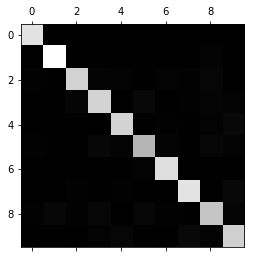

In [46]:
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()

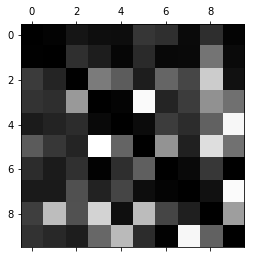

In [47]:
row_sums = conf_mx.sum(axis = 1, keepdims = True)
norm_conf_mx = conf_mx/row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()   # it seems like 8-9, 3-5 are easily getting misclassified

In [48]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

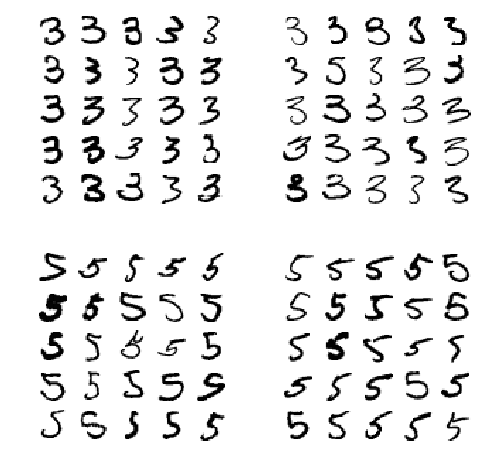

In [49]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]


plt.figure(figsize = (8,8))
plt.subplot(221)
plot_digits(X_aa[:25], images_per_row = 5)
plt.subplot(222)
plot_digits(X_ab[:25], images_per_row = 5)
plt.subplot(223)
plot_digits(X_ba[:25], images_per_row = 5)
plt.subplot(224)
plot_digits(X_bb[:25], images_per_row = 5)
plt.show()

In [50]:
# ultilabel classification

from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train%2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [51]:
knn_clf.predict([some_digit])

array([[False,  True]])

# There are many ways to evaluate a multilabel classifier, and selecting the right metric really depends on your project. For example, one approach is to measure the F1 score for each individual label (or any other binary classifier metric discussed earlier), then simply compute the average score.

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv = 3)
f1_score(y_train, y_train_knn_pred, average = 'macro') # average = 'macro' --> assumes all labels are equally important, otherwise average = 'weighted'


In [52]:
## multiouput-multiclass classification a.k.a multioutput classification


# add some noise to the pixel
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_tes_mod = X_test + noise
y_train_mod = X_train
y_test_mode = X_test


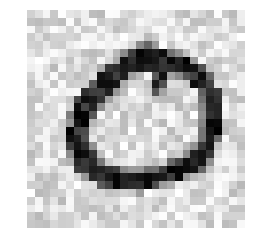

In [56]:
plot_digit(X_train_mod[30000])

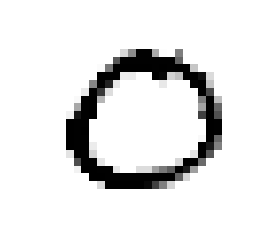

In [57]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_train_mod[30000]])
plot_digit(clean_digit)
